In [1]:
import datetime

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
from cachier import cachier


@cachier(stale_after=datetime.timedelta(hours=12))
def get_source_data(url: str) -> pd.DataFrame:
    return pd.read_csv(url)


csv = 'https://covid19-lake.s3.us-east-2.amazonaws.com/rearc-covid-19-world-cases-deaths-testing/csv/covid-19-world-cases-deaths-testing.csv'
csv = 'https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv?raw=true'
# csv = 'D:\\Downloads\\owid-covid-data.csv'
df = get_source_data(csv)

# some transformations
df["date"] = pd.to_datetime(df["date"])
df["new_cases"] = pd.to_numeric(df["new_cases"])
df["new_deaths"] = pd.to_numeric(df["new_deaths"])

today = datetime.datetime.utcnow().strftime('%Y-%m-%d')

# initialization for charts
params = {'axes.titlesize': 'large',
          'legend.fontsize': 'medium',
          'figure.figsize': (10, 5),
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'figure.titlesize': 'large'}

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')

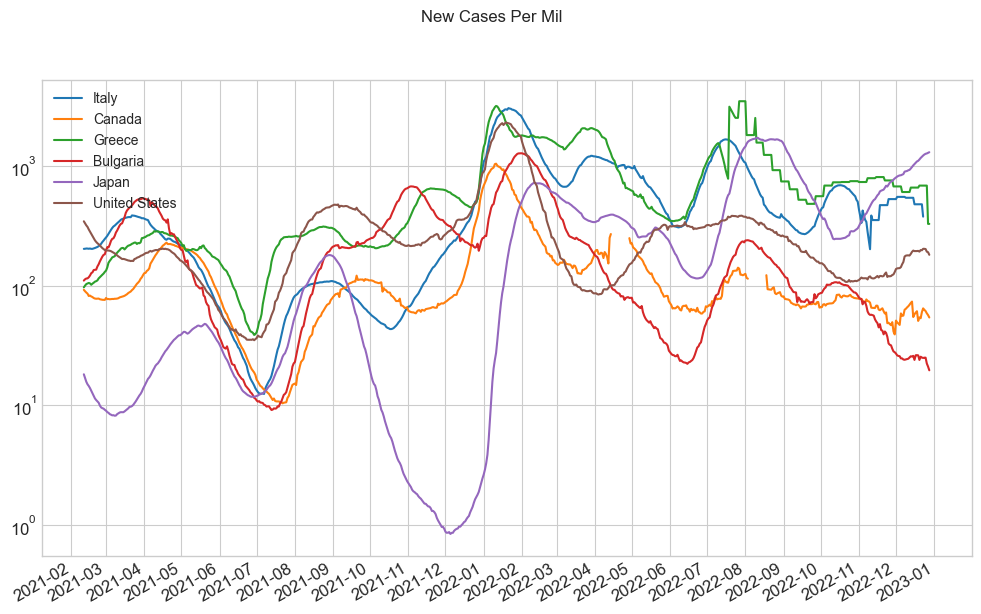

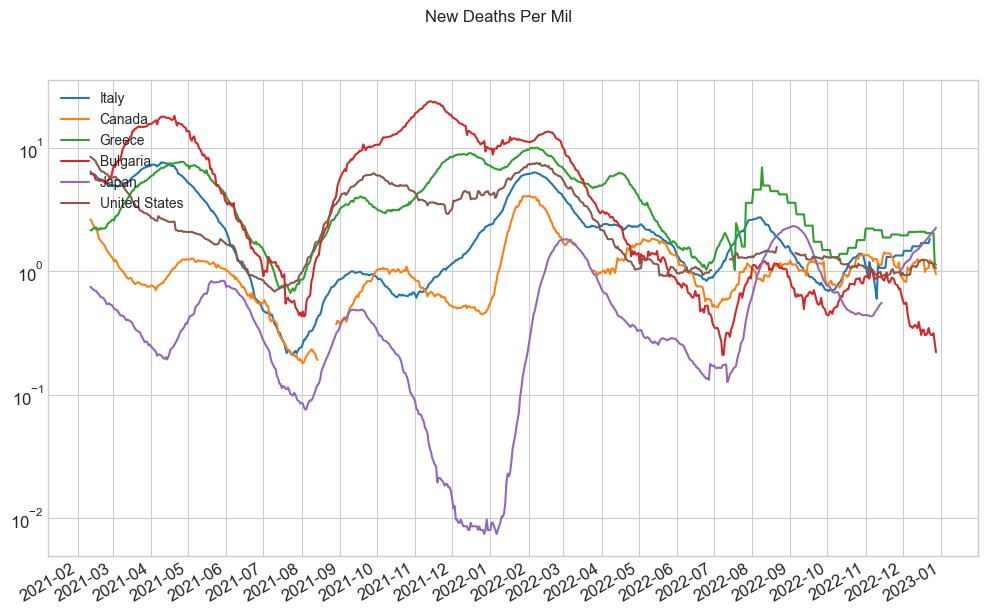

In [2]:
def plot_countries(cntr: list, dataset, target: str, fromdate: str, title: str):
    fig = plt.figure(figsize=(12, 7), dpi=100)
    fig.suptitle(title)

    ax : plt.Axes = fig.add_subplot(111)
    # To enable log scale uncomment below
    ax.set_yscale('log')
    # fig.subplots_adjust(top=0.85)


    # monthly xaxis ticks
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    for cntry in cc:
        plotdata = dataset.query(f"location=='{cntry}' and date>'{fromdate}'")[["date", target]]
        plotdata[target] = plotdata[target].rolling(window=14).mean()
        #plot the series
        line, = ax.plot(plotdata["date"], plotdata[target])
        line.set_label(cntry)

    ax.legend(loc='upper left')
    fig.autofmt_xdate()
    plt.show()

cc = ['Italy', 'Canada', 'Greece', 'Bulgaria', 'Japan', 'United States']
from_date = (datetime.datetime.strptime(today, '%Y-%m-%d') - datetime.timedelta(days=700)).strftime('%Y-%m-%d')
plot_countries(cc, df, "new_cases_per_million", from_date, 'New Cases Per Mil')
plot_countries(cc, df, "new_deaths_per_million", from_date, 'New Deaths Per Mil')

In [3]:
colset = ["date", "new_cases_per_million", "new_cases", "people_fully_vaccinated_per_hundred", "new_deaths"]
df.query("location=='Bulgaria'")[colset].sort_values(["date"], ascending=False).head(20)

date  new_cases_per_million  new_cases  \
34039 2022-12-28                 10.764       73.0   
34038 2022-12-27                 14.450       98.0   
34037 2022-12-26                 13.123       89.0   
34036 2022-12-25                  8.994       61.0   
34035 2022-12-24                 11.796       80.0   
34034 2022-12-23                 26.541      180.0   
34033 2022-12-22                 21.675      147.0   
34032 2022-12-21                 51.608      350.0   
34031 2022-12-20                  0.000        0.0   
34030 2022-12-19                 41.876      284.0   
34029 2022-12-18                  6.783       46.0   
34028 2022-12-17                 39.959      271.0   
34027 2022-12-16                  0.000        0.0   
34026 2022-12-15                 27.131      184.0   
34025 2022-12-14                 31.112      211.0   
34024 2022-12-13                 32.292      219.0   
34023 2022-12-12                 50.575      343.0   
34022 2022-12-11                  8.700       59.0   
34021 2022-12-10                 10.027       68.0   
34020 2022-12-09                 29.343      199.0   

       people_fully_vaccinated_per_hundred  new_deaths  
34039                                30.59         0.0  
34038                                30.59         0.0  
34037                                30.59         6.0  
34036                                30.59         1.0  
34035                                30.59         0.0  
34034                                30.59         1.0  
34033                                30.59         5.0  
34032                                30.59         2.0  
34031                                30.59         0.0  
34030                                30.59         0.0  
34029                                30.59         1.0  
34028                                30.59         4.0  
34027                                30.59         0.0  
34026                                30.59         1.0  
34025                                30.59         4.0  
34024                                30.59         5.0  
34023                                30.59         5.0  
34022                                  NaN         1.0  
34021                                  NaN         1.0  
34020                                  NaN         4.0

In [4]:
l = list(df.columns)
l.sort()
l

['aged_65_older',
 'aged_70_older',
 'cardiovasc_death_rate',
 'continent',
 'date',
 'diabetes_prevalence',
 'excess_mortality',
 'excess_mortality_cumulative',
 'excess_mortality_cumulative_absolute',
 'excess_mortality_cumulative_per_million',
 'extreme_poverty',
 'female_smokers',
 'gdp_per_capita',
 'handwashing_facilities',
 'hosp_patients',
 'hosp_patients_per_million',
 'hospital_beds_per_thousand',
 'human_development_index',
 'icu_patients',
 'icu_patients_per_million',
 'iso_code',
 'life_expectancy',
 'location',
 'male_smokers',
 'median_age',
 'new_cases',
 'new_cases_per_million',
 'new_cases_smoothed',
 'new_cases_smoothed_per_million',
 'new_deaths',
 'new_deaths_per_million',
 'new_deaths_smoothed',
 'new_deaths_smoothed_per_million',
 'new_people_vaccinated_smoothed',
 'new_people_vaccinated_smoothed_per_hundred',
 'new_tests',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'ne

In [5]:
colset = ["location", "date", "new_cases_per_million", "new_cases", "people_fully_vaccinated_per_hundred", "new_deaths_per_million"]
df[colset].query("date=='2022-09-08'").sort_values(["new_deaths_per_million"], ascending=False).head(20)

location       date  new_cases_per_million  new_cases  \
76781         Finland 2022-09-08                830.033     4599.0   
19611        Barbados 2022-09-08                181.078       51.0   
212286         Sweden 2022-09-08                416.708     4396.0   
13440       Australia 2022-09-08                302.627     7922.0   
39121          Canada 2022-09-08                182.242     7008.0   
51998         Croatia 2022-09-08                197.005      794.0   
44230           Chile 2022-09-08                303.259     5945.0   
232176  United States 2022-09-08                316.646   107118.0   
167262        Oceania 2022-09-08                210.063     9461.0   
111482          Japan 2022-09-08                906.361   112345.0   
97932       Hong Kong 2022-09-08               1480.999    11091.0   
109387          Italy 2022-09-08                293.322    17317.0   
95838     High income 2022-09-08                395.494   494571.0   
56099         Czechia 2022-09-08                300.648     3155.0   
83013         Germany 2022-09-08                431.751    35995.0   
160810  North America 2022-09-08                192.298   115441.0   
17568         Bahrain 2022-09-08                168.451      248.0   
206056    South Korea 2022-09-08               1339.147    69389.0   
90005       Guatemala 2022-09-08                 69.828     1246.0   
215414         Taiwan 2022-09-08               1467.058    35053.0   

        people_fully_vaccinated_per_hundred  new_deaths_per_million  
76781                                   NaN                  14.078  
19611                                 54.85                  10.652  
212286                                  NaN                   9.669  
13440                                   NaN                   3.209  
39121                                 82.06                   2.887  
51998                                 55.77                   2.729  
44230                                 90.13                   2.449  
232176                                67.83                   2.034  
167262                                61.62                   1.932  
111482                                82.91                   1.831  
97932                                 88.41                   1.602  
109387                                81.23                   1.508  
95838                                 74.07                   1.476  
56099                                 65.62                   1.429  
83013                                 76.10                   1.427  
160810                                64.19                   1.374  
17568                                 83.25                   1.358  
206056                                86.23                   1.312  
90005                                   NaN                   1.289  
215414                                84.44                   1.214